In [5]:
# Для каждого временного ряда (ВР) из своего варианта для двух базисных вейвлетов:

# 1.Выполнить непрерывное вейвлет- преобразование (НВП) ряда.
# Выбрать сечение вейвлет-спектра, где наилучшим образом видны локальные особенности ряда. Объяснить.



# 2. Выполнить дискретное вейвлет- преобразование (ДВП) своих ВР.
# •	Выбрать уровень разложения. Получить дерево. Объяснить.
# •	Выполнить декомпозицию ВР. Выделить уровни разложения, где видна периодичность. Найти длину периодов. Объяснить. ?
# •	Провести удаление шума. Объяснить, что и почему выбрано шумом. Показать восстановленный ВР без шумовых компонент. ?

# 3.	Выполнить пакетное вейвлет- преобразование (ПВП). Объяснить построение дерева. Объяснить понятие и выбор энтропии для построения пакетного дерева. Восстановить трендовые и периодические составляющие ВР без шума. Объяснить.


In [1]:
import numpy as np
import pandas as pd

from scipy import fftpack
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
data = pd.read_table('data/erum.txt.dat',sep=" ", header=None).drop(2,axis=1)
data.columns = ['time','value']
print(data.shape)

(20182, 2)


In [ ]:
data['time'][:1].values[0]

In [3]:
# data['time'] = data.time.apply(lambda x: round(x, 2))

In [ ]:
#  Фурье
#  Разрешающая способность локализации определяется принципом неопределенности Гейзенберга:
#  невозможно получить произвольно точное частотно-временное представление сигнала,  то есть
#  нельзя определить для какого-то момента времени, какие спектральные компоненты присутствуют
#  в сигнале. Чем уже окно, тем лучше временное разрешение, но хуже частотное, и наоборот.

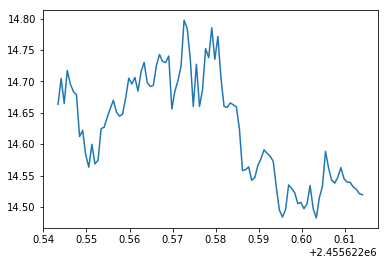

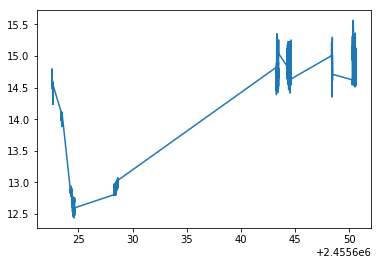

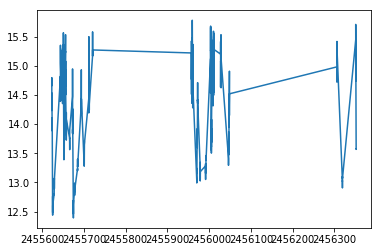

In [3]:
# non-stationary signal
n_vis = (100, 5000, len(data))
for n in n_vis:
    fig, ax = plt.subplots()
    ax.plot(data['time'][:n].values, data['value'][:n].values)

In [4]:
x = data.value.values

(-1, 105.0)

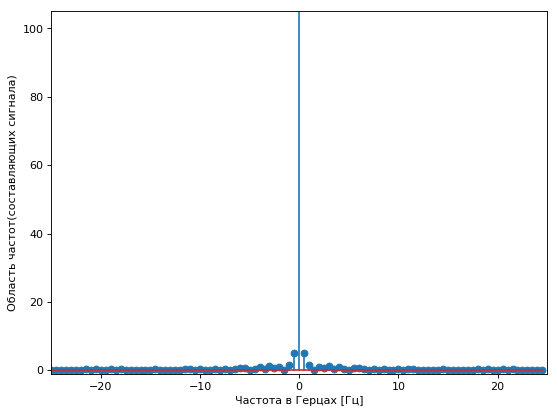

In [5]:
# преобразование фурье показывает одну доминирующую частоту (100 значений)
# не особо информативно
freq = 1  # частота в герцах => сигнал повторяется 1/10 секунду
f_s = 50  # SampleRate = частота дискретизации

X = fftpack.fft(x[:100])
freqs = fftpack.fftfreq(len(X)) * f_s

fig, ax = plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Частота в Герцах [Гц]')
ax.set_ylabel('Область частот(составляющих сигнала)')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-1, f_s * 2.1)

In [27]:
signal.spectrogram??

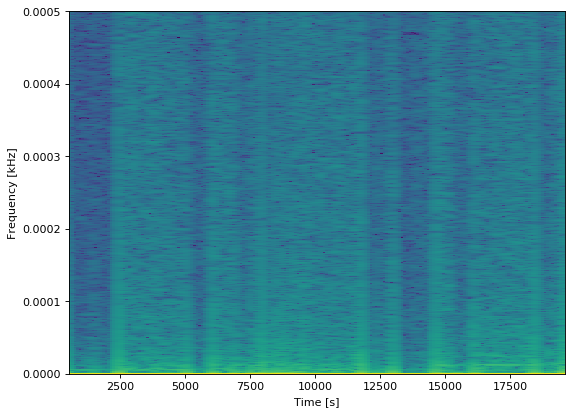

In [6]:
freqs, times, Sx = signal.spectrogram(x, fs=1, window='hanning',
                                      nperseg=1024, noverlap=1024 - 100,
                                      detrend=False, scaling='spectrum')

f, ax = plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

In [8]:
signal.spectrogram??

In [7]:
data['time'].describe()

count    2.018200e+04
mean     2.455846e+06
std      1.953882e+02
min      2.455623e+06
25%      2.455651e+06
50%      2.455958e+06
75%      2.456004e+06
max      2.456352e+06
Name: time, dtype: float64

In [8]:
import pywt

In [9]:
print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [10]:
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))

haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

In [11]:
w = pywt.Wavelet('db3')
print(w)

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [145]:
# (phi, psi, x) = w.wavefun(level=5)

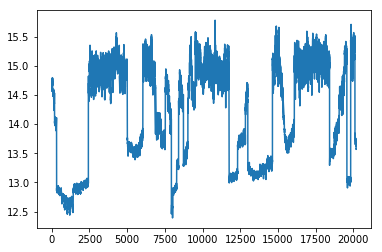

In [15]:
x = data.value.values
n = len(x)
fig, ax = plt.subplots()
ax.plot(x[:n])

In [13]:
# cwt
print(n)

20182


In [31]:
pywt.cwt??

In [14]:
coefs, freqs = pywt.cwt(x, np.arange(1,len(x)), 'gaus2')

KeyboardInterrupt: 

In [128]:
print(coefs.shape, freqs.shape)

(96, 97) (96,)


In [123]:
coefs.shape

(97, 98)

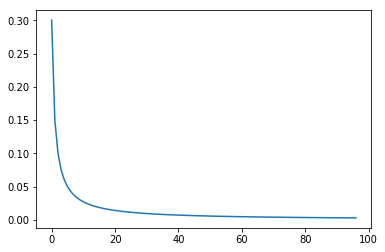

In [124]:
fig, ax = plt.subplots()
ax.plot(freqs)

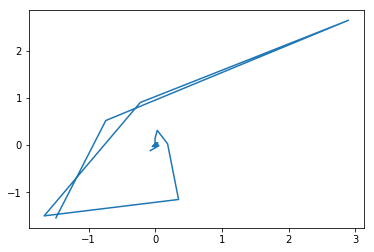

In [126]:
fig, ax = plt.subplots()
ax.plot(coefs[0],coefs[1])

In [118]:
# x = coefs[0][:len(coefs[0])-1]
# y = freqs
# z = coefs[1][:len(coefs[0])-1]

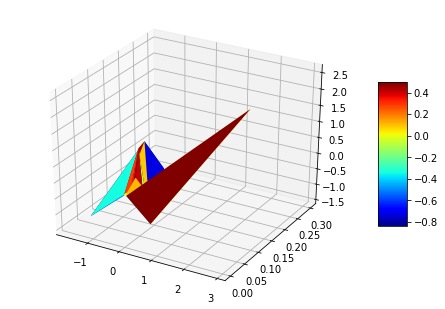

In [120]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('teste.pdf')
plt.show()

In [100]:
pywt.cwt??

In [78]:
!pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\unicorn\AppData\Local\pip\Cache\wheels\33\be\39\f82c0f53ea29777fdc29afaf7bfad87442488a280662d355fb
Successfully built plotly


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [90]:
plotly.graph_objs.Surface??

In [89]:
# import plotly
# from plotly.graph_objs import Scatter, Layout,Scatter3d

# plotly.offline.init_notebook_mode(connected=True)

# plotly.offline.iplot({
#     "data": [Scatter3d(x=x, y=y, z=z)],
# })

In [134]:
x.shape

(20182,)

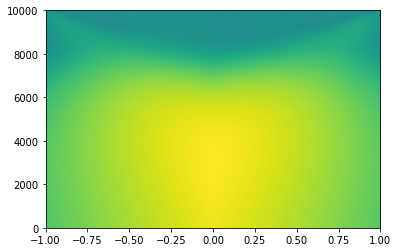

In [143]:
from scipy import signal
import matplotlib.pyplot as plt

# length = min(10 * width[ii], len(data))
# cwt[ii,:] = scipy.signal.convolve(data, wavelet(length,width[ii]), mode='same')
                                                
                                                
                                                
t = np.linspace(-1, 1, 200, endpoint=False)
# sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
kk = 10000
sig = x[:kk]
widths = np.arange(1, kk)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, kk], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [138]:
cwtmatr.shape

(9999, 10000)

In [142]:
cwtmatr

array([[-1.58740122e-02,  8.42940549e+00,  3.25526968e+00, ...,
         3.12759608e-01,  3.30968455e+00,  8.45992181e+00],
       [-1.46275984e-02,  8.17423948e+00,  1.11693563e+01, ...,
         8.89736088e+00,  1.12200708e+01,  8.23182370e+00],
       [ 8.26198373e-03,  7.07972196e+00,  1.19753666e+01, ...,
         1.36086900e+01,  1.20129706e+01,  7.11617119e+00],
       ...,
       [ 5.31855117e+02,  5.31981543e+02,  5.32108702e+02, ...,
         5.43586529e+02,  5.43460538e+02,  5.43334509e+02],
       [ 5.31842560e+02,  5.31968980e+02,  5.32096133e+02, ...,
         5.43572793e+02,  5.43446808e+02,  5.43320784e+02],
       [ 5.31830002e+02,  5.31956416e+02,  5.32083563e+02, ...,
         5.43559055e+02,  5.43433076e+02,  5.43307059e+02]])

In [96]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
        opacity=0.8
    )
)
fig = go.Figure(data=[trace1], layout=layout)
# iplot(fig, filename='simple-3d-scatter')
plotly.offline.iplot(fig)

In [70]:
print(coefs[0].shape, coefs[1].shape, freqs.shape)
print(x.shape, y.shape, z.shape)

(512,) (512,) (511,)
(511,) (511,) (511,)


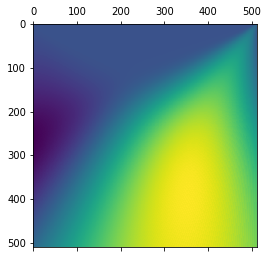

In [40]:
# x = np.arange(512)
# y = np.sin(2*np.pi*x/32)
# coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coefs) # doctest: +SKIP
plt.show() # doctest: +SKIP

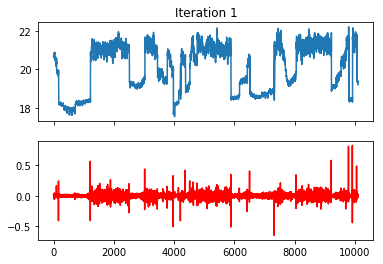

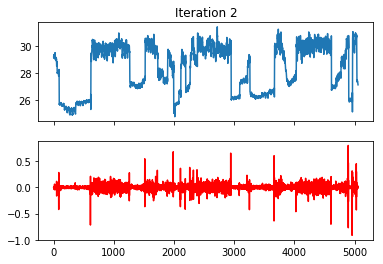

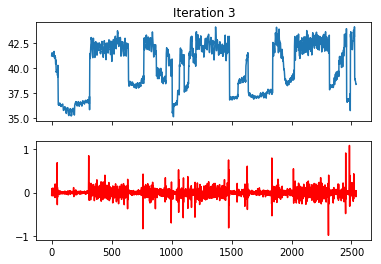

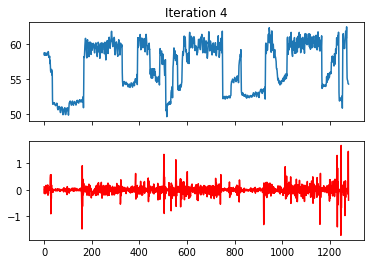

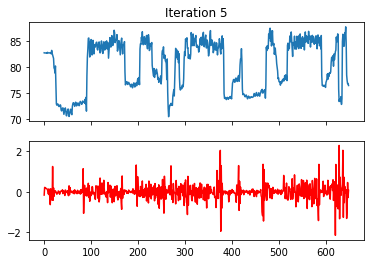

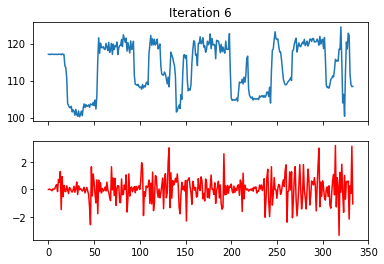

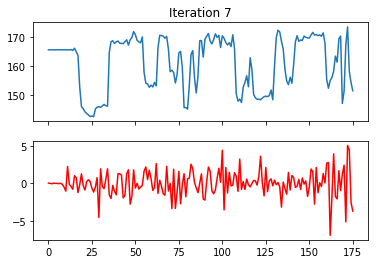

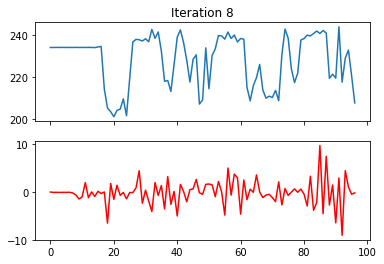

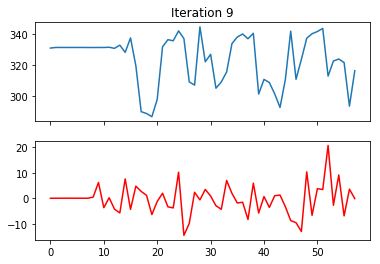

In [16]:
curr = x
coef_mas = []
for index in range(1,10):
    cA, cD = pywt.dwt(curr, 'db10') # Approximation and detail coefficients.
    coef_mas.append([cA,cD])
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(cA)
    axarr[0].set_title('Iteration ' + str(index))
    axarr[1].plot(cD, c="red")
    curr = cA

In [17]:
coef_mas = np.array(coef_mas)
coef_mas.shape

(9, 2)

In [22]:
x_rec = pywt.idwt(coef_mas[8][0],coef_mas[8][1],'db10')

(98,)


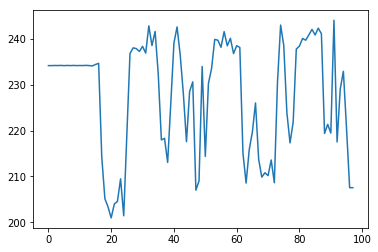

In [23]:
print(x_rec.shape)
fig, ax = plt.subplots()
ax.plot(x_rec)

In [24]:
cA.shape, cD.shape

((58,), (58,))

In [21]:
coef_mas[0][0
           ]

array([20.75174555, 20.76501761, 20.7875693 , ..., 19.22172315,
       19.19396126, 19.20247459])

In [22]:
# WaveLets

In [23]:
!pip install wavelets

  Could not find a version that satisfies the requirement wavelets (from versions: )
No matching distribution found for wavelets
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:
from wavelets import wavelets

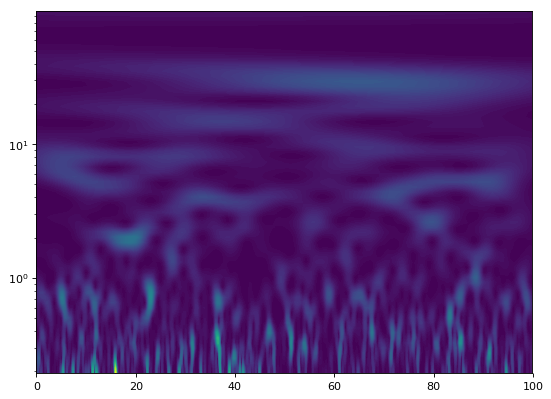

In [25]:
# given a signal x(t)
x = np.random.randn(1000)
# x = data.value.values[:1000]
# and a sample spacing
dt = 0.1
wa =wavelets. WaveletAnalysis(x, dt=dt)
# wavelet power spectrum
power = wa.wavelet_power
# scales 
scales = wa.scales
# associated time vector
t = wa.time
# reconstruction of the original data
rx = wa.reconstruction()

fig, ax = plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
T, S = np.meshgrid(t, scales)
ax.contourf(T, S, power, 100)
ax.set_yscale('log')
# fig.savefig('test_wavelet_power_spectrum.png')

In [38]:
# given a signal x(t)
# x = np.random.randn(1000)
x = data.value.values[:10000]
# and a sample spacing
dt = 0.1

wa =wavelets. WaveletAnalysis(x, dt=dt)

# wavelet power spectrum
power = wa.wavelet_power

# scales 
scales = wa.scales

# associated time vector
t = wa.time

# reconstruction of the original data
rx = wa.reconstruction()

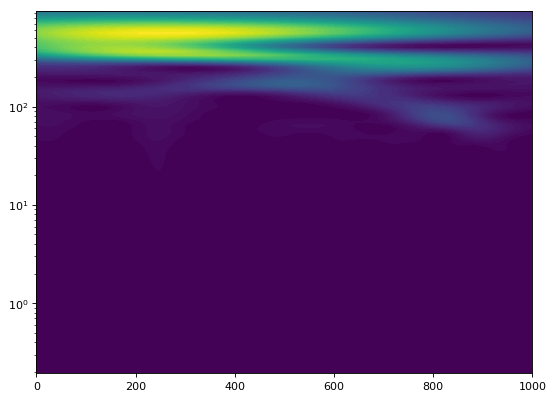

In [39]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
T, S = np.meshgrid(t, scales)
ax.contourf(T, S, power, 100)
ax.set_yscale('log')
# fig.savefig('test_wavelet_power_spectrum.png')

In [40]:
rx

array([14.963493  +0.j, 15.01794419+0.j, 14.94959239+0.j, ...,
       14.71166329+0.j, 14.60237644+0.j, 14.58691846+0.j])

In [93]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# # import random

# # def fun(x, y):
# #     return x**2 + y

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# # x = y = np.arange(-3.0, 3.0, 0.05)
# # X, Y = np.meshgrid(x, y)
# # zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
# # Z = zs.reshape(X.shape)


# x = coefs[0][:len(coefs[0])-1]
# y = freqs
# z = coefs[1][:len(coefs[0])-1]

# X, Y = np.meshgrid(x,y)
# Z = 